In [1]:
# !pip install pandas pydotplus pyarrow

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
import pydotplus
from IPython.display import Image

In [3]:
# 2 Define the function for generating decision tree.

def create_tree(training_data):
    data = training_data.iloc[:,:-1]
    labels = training_data.iloc[:,-1]
    trained_tree = tree.DecisionTreeClassifier(criterion='entropy')
    trained_tree.fit(data, labels)
    return trained_tree

In [4]:
# 3 Define the function for saving the generated tree diagram.

def show_tree_pdf(trained_tree):
    dot_data = tree.export_graphviz(trained_tree, out_file=None)
    graph = pydotplus.graph_from_dot_data(dot_data)
    return Image(graph.create_png())

In [5]:
# 4 Define the function for generating vectorized data.

def data_vector(data):
    names = data.columns[:-1]
    
    for i in names:
        col = pd.Categorical(data[i])
        data[i] = col.codes
    return data
    

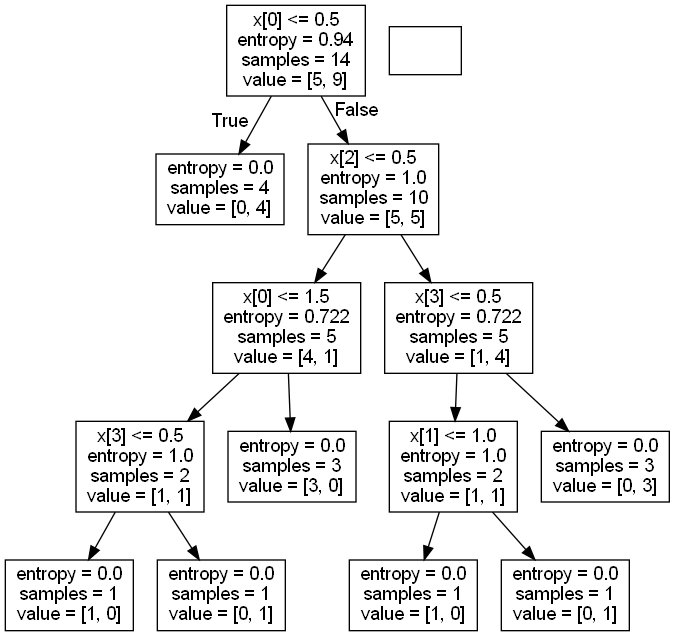

In [6]:
# 5 Invoke function for prediction

data = pd.read_table("ML/tennis.txt", header=None, sep='\t')
training_vec = data_vector(data)
decision_tree = create_tree(training_vec)
show_tree_pdf(decision_tree)

In [7]:
# 6 Predict new sample

test_vec = [0,0,1,1]

print(decision_tree.predict(np.array(test_vec).reshape(1,-1)))

['Y']
